LIMPIEZA DE DATOS PROYECTO BI

Incluir paquetes

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.impute import SimpleImputer

Cargar data

In [6]:
data = pd.read_csv('./Data/NoProcesada/Relacional/alumno_corrupta.csv', sep=',', encoding='utf-8')

MUESTRA DE DATOS

In [7]:
data.head()

,id_alumno,codigo_estudiante,id_persona,id_sede,columna_vacia
0,error,5455.0,3077.0,61.0,NaN
1,2.0,1636.0,4164.0,74.0,NaN
2,3.0,6731.0,7557.0,38.0,NaN
3,4.0,NaN,1230.0,45.0,NaN
4,5.0,error,8254.0,56.0,NaN


Verificar estructura

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15750 entries, 0 to 15749
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_alumno          14392 non-null  object 
 1   codigo_estudiante  14341 non-null  object 
 2   id_persona         14253 non-null  float64
 3   id_sede            14302 non-null  float64
 4   columna_vacia      1575 non-null   object 
dtypes: float64(2), object(3)
memory usage: 615.4+ KB


Estadisticas

In [9]:
data.describe()

,id_persona,id_sede
count,14253.000000,14302.000000
mean,7557.364934,76.090458
std,10733.795007,108.397187
min,1.000000,1.000000
25%,2681.000000,27.000000
50%,5331.000000,54.000000
75%,8032.000000,80.000000
max,50431.920368,506.567881


Estadisticas de campos categoricos

In [10]:
obj_cols = data.select_dtypes(include=['O']).columns
if len(obj_cols) > 0:
	display(data.describe(include=['O']))
else:
	print("No object (categorical) columns in the dataframe.")

,id_alumno,codigo_estudiante,columna_vacia
count,14392,14341,1575
unique,12245,6716,1
top,error,error,valor
freq,792,789,1575


Visualizar el tamaño del dataset

In [11]:
data.shape

(15750, 5)

Cambiar tipos de datos

In [12]:
# data['id_sede_clase'] = data['id_sede_clase'].astype('category')
# data['id_alumno'] = data['id_alumno'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15750 entries, 0 to 15749
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_alumno          14392 non-null  object 
 1   codigo_estudiante  14341 non-null  object 
 2   id_persona         14253 non-null  float64
 3   id_sede            14302 non-null  float64
 4   columna_vacia      1575 non-null   object 
dtypes: float64(2), object(3)
memory usage: 615.4+ KB


,id_alumno,codigo_estudiante,id_persona,id_sede,columna_vacia
0,error,5455.0,3077.0,61.0,NaN
1,2.0,1636.0,4164.0,74.0,NaN
2,3.0,6731.0,7557.0,38.0,NaN
3,4.0,NaN,1230.0,45.0,NaN
4,5.0,error,8254.0,56.0,NaN


OUTLIERS - Modo Grafico

C:\Users\ji-la\AppData\Local\Temp\ipykernel_33344\2956398687.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


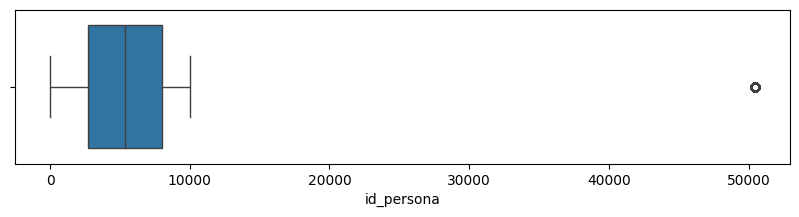

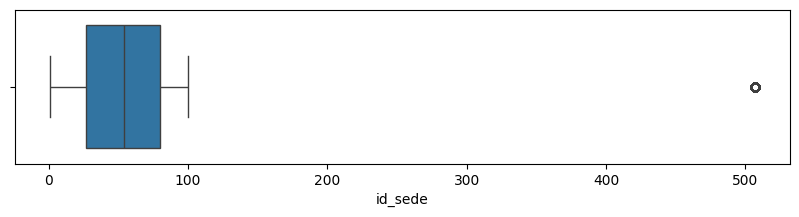

In [13]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')
    
cols=data.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data[cols], x=col)

OUTLIERS - Calculado

IRQ = Rango Intercuartirico

In [14]:
outliers={}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IRQ = Q3 - Q1
  LI = Q1 - 1.5 * IRQ
  LS = Q3 + 1.5 * IRQ
  outliers[col] = data[(data[col] < LI) | (data[col] > LS)][col]

  print(f'{col}: {len(outliers[col])} outliers')

id_persona: 0 outliers
id_sede: 0 outliers


In [15]:
data.mean
data.std

<bound method DataFrame.std of       id_alumno codigo_estudiante  id_persona  id_sede columna_vacia
0         error            5455.0      3077.0     61.0           NaN
1           2.0            1636.0      4164.0     74.0           NaN
2           3.0            6731.0      7557.0     38.0           NaN
3           4.0               NaN      1230.0     45.0           NaN
4           5.0             error      8254.0     56.0           NaN
...         ...               ...         ...      ...           ...
15745    1950.0            1471.0      1473.0    100.0           NaN
15746   14295.0            4708.0      9994.0     57.0           NaN
15747   11784.0             error      6199.0     98.0           NaN
15748   13679.0            6284.0         NaN     64.0           NaN
15749   13313.0            3063.0      2506.0      NaN           NaN

[15750 rows x 5 columns]>

<Axes: xlabel='id_alumno', ylabel='Count'>

Error in callback <function _draw_all_if_interactive at 0x000001D78677F060> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

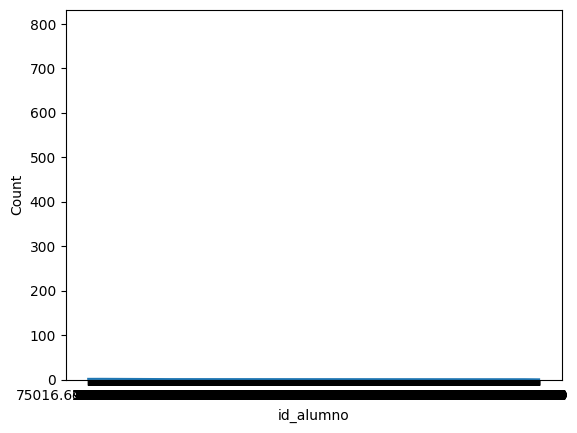

In [16]:
sns.histplot(data=data, x='id_alumno', kde=True)

In [ ]:
# data.isna().sum()
# isna, traer valores nulos
data.isna().mean()*100

idAsistencia      9.033333
id_sede_clase     8.900000
id_alumno         9.504762
columna_vacia    90.000000
dtype: float64

Eliminar valores nulos

In [ ]:
#axis   1 columna,  0 fila
data.drop('id_alumno', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   idAsistencia   19103 non-null  object
 1   id_sede_clase  19131 non-null  object
 2   columna_vacia  2100 non-null   object
dtypes: object(3)
memory usage: 492.3+ KB


Imputar datos

In [ ]:
impute = SimpleImputer(strategy='median')
print ('Mediana incial:' , data['id_alumno'].median())
salida = impute.fit_transform(data[['id_alumno']])
salida = pd.DataFrame(salida)
print('\n Nulos en los nuevos datos', salida.isna().sum())
print('\n  Mediana nuevo datos', salida.median())


KeyError: 'id_alumno'

In [ ]:
impute = SimpleImputer(strategy='constant', fill_value='$')
print ('Recuento incial:' , data['Embarked'].value_counts())
salida = impute.fit_transform(data[['Embarked']])
salida = pd.DataFrame(salida)
print('\n Nulos en los nuevos datos', salida.isna().sum())
print('\n  Recuento nuevo datos', salida.value_counts())


KeyError: 'id_alumno'